2025-02-12 07:46:51,013 - utils.py - load_data - INFO - Dataset loaded with shape: (251, 8)


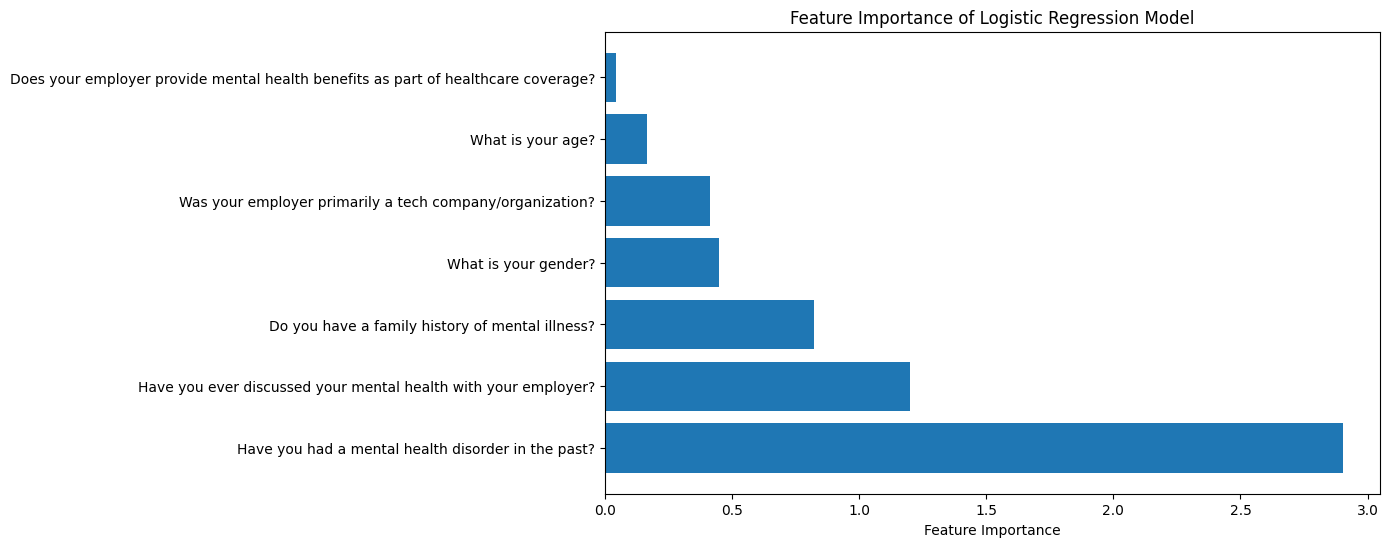

In [6]:
import sys
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
# Add the src directory to the system path
sys.path.append(os.path.abspath(os.path.join('..', 'src')))
from logger import logger 
from utils import load_data
import logging
logging.getLogger('matplotlib').setLevel(logging.WARNING)
try:
    # Load the dataset using the load_data function from utils
    X, y = load_data()

    if X is not None and y is not None:
        # Train your Logistic Regression model
        logreg = LogisticRegression(max_iter=300, C=1, class_weight={0: 1, 1: 1.5}, random_state=42, penalty='l2')
        logreg.fit(X, y)

        # Get feature importance
        feature_names = X.columns
        feature_importance = np.abs(logreg.coef_[0])
        sorted_idx = np.argsort(feature_importance)[::-1]
        # Plot 
        plt.figure(figsize=(10, 6))
        plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
        plt.yticks(range(len(sorted_idx)), feature_names[sorted_idx])
        plt.xlabel('Feature Importance')
        plt.title('Feature Importance of Logistic Regression Model')
        plt.show()

    else:
        logger.error("Error loading data: Dataset is empty or improperly formatted.")
        print("Error loading data. Please check the dataset path or format.")
    
except Exception as e:
    logger.error(f"An error occurred during model training or plotting: {str(e)}")
    print("An error occurred. Please check the log for details.")
